In [32]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
my_data = pd.read_csv("D:\DataSci\Resources\drug200.csv", delimiter=",")
my_data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [28]:
my_data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [18]:
X = my_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y = my_data['Drug'].values

In [19]:
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [20]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])
X[0:5]

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.114],
       [28, 0, 'NORMAL', 'HIGH', 7.798],
       [61, 0, 'LOW', 'HIGH', 18.043]], dtype=object)

In [23]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])
X[0:5,:]

array([[23, 0, 0, 'HIGH', 25.355],
       [47, 1, 1, 'HIGH', 13.093],
       [47, 1, 1, 'HIGH', 10.114],
       [28, 0, 2, 'HIGH', 7.798],
       [61, 0, 1, 'HIGH', 18.043]], dtype=object)

In [24]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2)


In [26]:
drugTree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
drugTree.fit(X_train,y_train)




DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [30]:
predTree = drugTree.predict(X_test)
print(predTree[0:5])
print(y_test[0:5])

['drugX' 'drugC' 'drugX' 'drugX' 'drugY']
['drugX' 'drugC' 'drugX' 'drugX' 'drugY']


In [31]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,predTree))

1.0


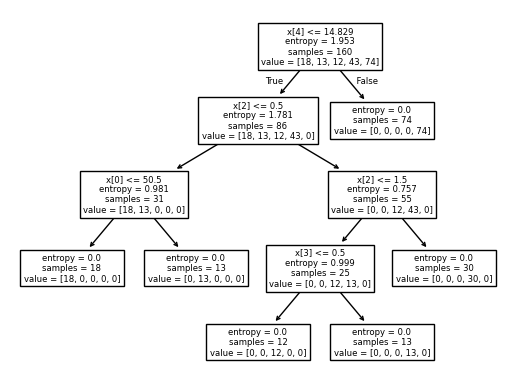

In [33]:
tree.plot_tree(drugTree)
plt.show()